In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d princelv84/dogsvscats

Dataset URL: https://www.kaggle.com/datasets/princelv84/dogsvscats
License(s): MIT
dogsvscats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zipref = zipfile.ZipFile('/content/dogsvscats.zip','r')
zipref.extractall('/content')
zipref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# genrators :- devide data in batches
# Training data
train_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/train/',
    labels = 'inferred',
    label_mode = 'int', # assign cat 0 and dog 1
    batch_size = 32,
    image_size = (256,256)
)

# Testing data
test_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/test/',
    labels = 'inferred',
    label_mode = 'int', # assign cat 0 and dog 1
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# which means trasforming our pixel values from 0-255 to 0-1
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [ ]:
train_ds

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
model=Sequential()

model.add((Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))) # concolution layer
model.add(BatchNormalization())
model.add((MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))) # pooling layer

model.add((Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))) # concolution layer
model.add(BatchNormalization())
model.add((MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))) # pooling layer

model.add((Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))) # concolution layer
model.add(BatchNormalization())
model.add((MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))) # pooling layer

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.2),
])

# Apply data augmentation to the training dataset
augmented_train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

# Now, let's retrain the model with the augmented data for a reasonable number of epochs (e.g., 10 or 15 or 20)
history=model.fit(augmented_train_ds, epochs=19, validation_data=test_ds)

Epoch 1/19
625/625 ━━━━━━━━━━━━━━━━━━━━ 332s 518ms/step - accuracy: 0.5531 - loss: 2.7625 - val_accuracy: 0.6698 - val_loss: 0.6317
Epoch 2/19
625/625 ━━━━━━━━━━━━━━━━━━━━ 325s 519ms/step - accuracy: 0.6541 - loss: 0.6209 - val_accuracy: 0.7108 - val_loss: 0.5583
Epoch 3/19
625/625 ━━━━━━━━━━━━━━━━━━━━ 325s 520ms/step - accuracy: 0.7073 - loss: 0.5644 - val_accuracy: 0.7666 - val_loss: 0.5042
Epoch 4/19
625/625 ━━━━━━━━━━━━━━━━━━━━ 326s 522ms/step - accuracy: 0.7487 - loss: 0.5156 - val_accuracy: 0.7432 - val_loss: 0.5057
Epoch 5/19
625/625 ━━━━━━━━━━━━━━━━━━━━ 377s 513ms/step - accuracy: 0.7715 - loss: 0.4881 - val_accuracy: 0.7924 - val_loss: 0.4301
Epoch 6/19
625/625 ━━━━━━━━━━━━━━━━━━━━ 320s 512ms/step - accuracy: 0.7835 - loss: 0.4625 - val_accuracy: 0.6910 - val_loss: 0.5844
Epoch 7/19
625/625 ━━━━━━━━━━━━━━━━━━━━ 320s 512ms/step - accuracy: 0.8028 - loss: 0.4341 - val_accuracy: 0.7684 - val_loss: 0.4586
Epoch 8/19
625/625 ━━━━━━━━━━━━━━━━━━━━ 319s 510ms/step - accuracy: 0.8159 -

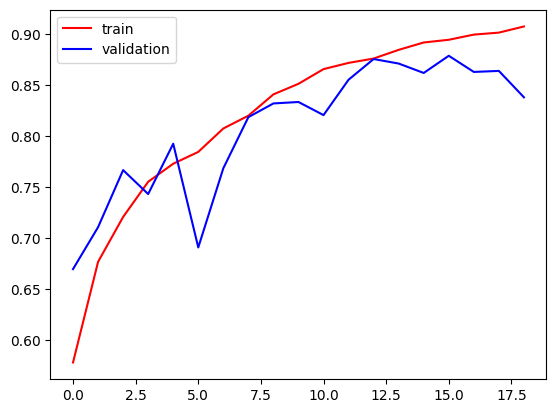

In [ ]:
import matplotlib.pyplot as plt
# accuracy plots
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

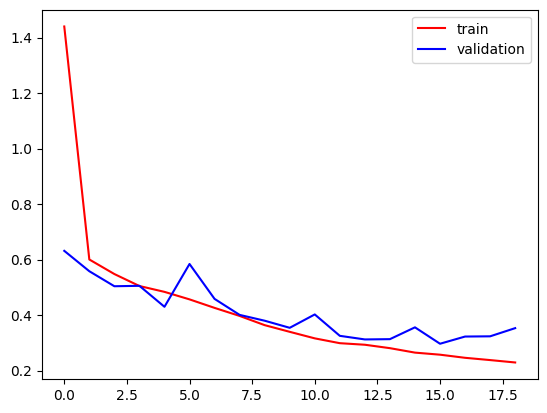

In [ ]:
# loss plot
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

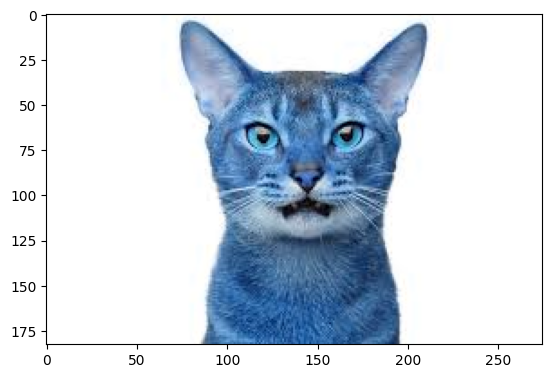

In [ ]:
ctest_img=cv2.imread('/content/download.jpg')
plt.imshow(ctest_img)

In [ ]:
ctest_img.shape

(183, 275, 3)

In [ ]:
ctest_img=cv2.resize(ctest_img,(256,256))

In [ ]:
cinput=ctest_img.reshape((1,256,256,3))

In [ ]:
model.predict(cinput)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[0.5143644]], dtype=float32)

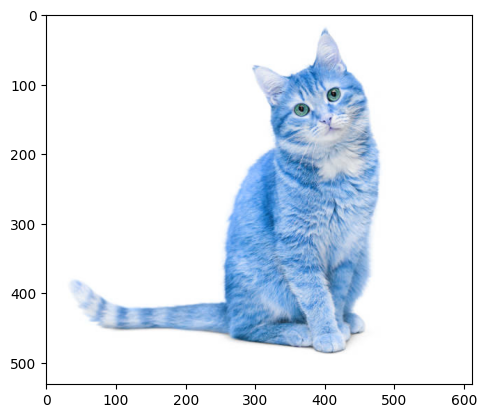

In [ ]:
dtest_img=cv2.imread('/content/istockphoto-1443562748-612x612.jpg')
plt.imshow(dtest_img)
dtest_img.shape
dtest_img=cv2.resize(dtest_img,(256,256))
dinput=dtest_img.reshape((1,256,256,3))

In [ ]:
model.predict(dinput)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[0.]], dtype=float32)

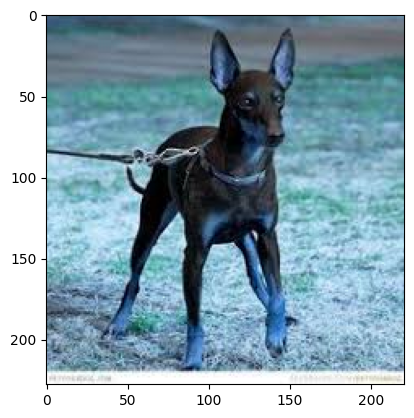

In [ ]:
dtest_img=cv2.imread('/content/download (2).jpg')
plt.imshow(dtest_img)
dtest_img.shape
dtest_img=cv2.resize(dtest_img,(256,256))
dinput=dtest_img.reshape((1,256,256,3))

In [ ]:
model.predict(dinput)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[1.]], dtype=float32)